In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import tkinter as tk
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request

In [2]:
df = pd.read_csv('dataset.csv')
print(df.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [3]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [4]:
df1 = pd.read_csv('Symptom-severity.csv')
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


In [5]:
df.isna().sum()
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [6]:
cols = df.columns
data = df[cols].values.flatten()

In [7]:
s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

In [8]:
df = pd.DataFrame(s, columns=df.columns)

In [9]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
vals = df.values
symptoms = df1['Symptom'].unique()

In [11]:
for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

In [12]:
d = pd.DataFrame(vals, columns=cols)

In [13]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
(df[cols] == 0).all()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4     False
Symptom_5     False
Symptom_6     False
Symptom_7     False
Symptom_8     False
Symptom_9     False
Symptom_10    False
Symptom_11    False
Symptom_12    False
Symptom_13    False
Symptom_14    False
Symptom_15    False
Symptom_16    False
Symptom_17    False
dtype: bool

In [15]:
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [16]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [17]:
data = df.iloc[:,1:].values
labels = df['Disease'].values
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4182, 17) (738, 17) (4182,) (738,)


In [18]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [19]:
preds = model.predict(x_test)

In [20]:
print(preds)

['Bronchial Asthma' 'Arthritis' 'GERD' 'Gastroenteritis' 'Hyperthyroidism'
 'Diabetes' 'Bronchial Asthma' 'Diabetes' 'Hepatitis D' 'Allergy'
 'Pneumonia' 'Common Cold' 'Alcoholic hepatitis' 'Typhoid'
 'Urinary tract infection' 'Arthritis' 'AIDS' 'Chronic cholestasis'
 'Migraine' 'Osteoarthristis' 'Typhoid' 'Osteoarthristis' 'Common Cold'
 'Allergy' 'Varicose veins' 'Fungal infection' 'Impetigo' 'Impetigo'
 'Varicose veins' 'Chicken pox' 'Common Cold' 'Hypoglycemia' 'Pneumonia'
 'Acne' 'Hypertension' 'Malaria' 'Cervical spondylosis' 'Fungal infection'
 'Jaundice' 'Diabetes' 'Hepatitis E' 'Hyperthyroidism' 'Bronchial Asthma'
 'Cervical spondylosis' 'Hepatitis D' 'Fungal infection'
 'Fungal infection' 'AIDS' 'Chronic cholestasis' 'Hyperthyroidism'
 'Hypertension' 'Peptic ulcer diseae' 'Hypertension' 'GERD'
 'Paralysis (brain hemorrhage)' 'Common Cold' 'Jaundice' 'Osteoarthristis'
 'Urinary tract infection' 'Allergy' 'Drug Reaction'
 'Cervical spondylosis' 'Pneumonia' 'Chronic cholestasis'

In [21]:
import joblib

In [22]:
joblib.dump(model, "C:\\Users\\HP\\Downloads\\CodePen_Export_QWgrPvp\\CodePen_Export_QWgrPvp\\model.pkl")

['C:\\Users\\HP\\Downloads\\CodePen_Export_QWgrPvp\\CodePen_Export_QWgrPvp\\model.pkl']

F1-score% = 93.93923124264073 | Accuracy% = 93.90243902439023


<Axes: >

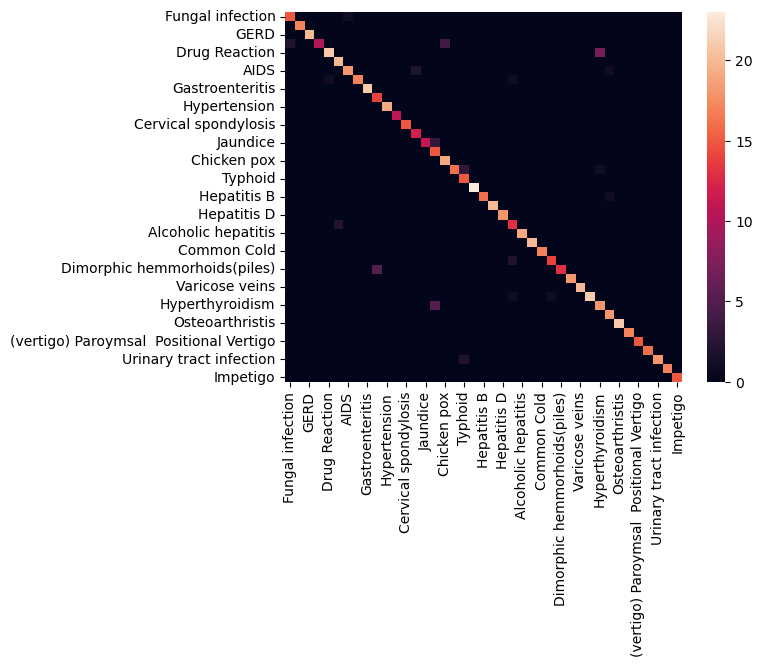

In [23]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [24]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        SVM()

In [25]:
def SVM():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    loc = location.get()
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
                
    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])
    
    if(pred2[0]=="GERD"):
        z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=1&field2=0&field3='+str(loc))
        z.read()
    if(pred2[0]=="Hepatitis C"):
        r=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=0&field2=1&field3='+str(loc))
        r.read()

In [26]:
root = tk.Tk()
root.title(" Disease Prediction From Symptoms")
root.configure()

{'bd': ('bd', '-borderwidth'),
 'borderwidth': ('borderwidth',
  'borderWidth',
  'BorderWidth',
  <string object: '0'>,
  0),
 'class': ('class', 'class', 'Class', 'Toplevel', 'Tk'),
 'menu': ('menu', 'menu', 'Menu', '', ''),
 'relief': ('relief', 'relief', 'Relief', <string object: 'flat'>, 'flat'),
 'screen': ('screen', 'screen', 'Screen', '', ''),
 'use': ('use', 'use', 'Use', '', ''),
 'background': ('background',
  'background',
  'Background',
  <string object: 'SystemButtonFace'>,
  'SystemButtonFace'),
 'bg': ('bg', '-background'),
 'colormap': ('colormap', 'colormap', 'Colormap', '', ''),
 'container': ('container', 'container', 'Container', 0, 0),
 'cursor': ('cursor', 'cursor', 'Cursor', '', ''),
 'height': ('height', 'height', 'Height', <string object: '0'>, 0),
 'highlightbackground': ('highlightbackground',
  'highlightBackground',
  'HighlightBackground',
  <string object: 'SystemButtonFace'>,
  'SystemButtonFace'),
 'highlightcolor': ('highlightcolor',
  'highlightColo

In [27]:
Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)
location = StringVar()
location.set(None)

In [28]:
w2 = Label(root, justify=CENTER, text=" Disease Prediction From Symptoms ")
w2.config(font=("Helvetica", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

In [29]:
NameLb1 = Label(root, text="")
NameLb1.config(font=("Helvetica", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

In [30]:
S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Helvetica", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Helvetica", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Helvetica", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

In [31]:
S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Helvetica", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Helvetica", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

locLb = Label(root,  text="Location")
locLb.config(font=("Helvetica", 15))
locLb.grid(row=12, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Helvetica", 15))
lr.grid(row=15, column=1,pady=10)

In [32]:
#OPTIONS = sorted(symptoms)
OPTIONS = ["fatigue", "yellowish_skin", "loss_of_appetite", "yellowing_of_eyes", 'family_history',"stomach_pain", "ulcers_on_tongue", "vomiting", "cough", "chest_pain"]
LOCATIONS = ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru"]

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=1)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=1)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=1)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=1)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=1)

In [33]:
LocEn = OptionMenu(root, location,*LOCATIONS)
LocEn.grid(row=12, column=1)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

In [34]:
t3 = Text(root, height=2, width=20)
t3.config(font=("Helvetica", 20))
t3.grid(row=19, column=1 , padx=10)

In [35]:
root.mainloop()

In [36]:
import pickle

In [37]:
filename = "trained_models.sav"
pickle.dump(model, open(filename,'wb'))

In [38]:
#loading the saved model
loaded_model = pickle.load(open('trained_models.sav', 'rb'))

In [39]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        SVM()

In [40]:
def SVM():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    loc = location.get()
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
                
    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])
    
    if(pred2[0]=="GERD"):
        z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=1&field2=0&field3='+str(loc))
        z.read()
    if(pred2[0]=="Hepatitis C"):
        r=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=0&field2=1&field3='+str(loc))
        r.read()

In [41]:
root = tk.Tk()
root.title(" Disease Prediction From Symptoms")
root.configure()

{'bd': ('bd', '-borderwidth'),
 'borderwidth': ('borderwidth',
  'borderWidth',
  'BorderWidth',
  <string object: '0'>,
  0),
 'class': ('class', 'class', 'Class', 'Toplevel', 'Tk'),
 'menu': ('menu', 'menu', 'Menu', '', ''),
 'relief': ('relief', 'relief', 'Relief', <string object: 'flat'>, 'flat'),
 'screen': ('screen', 'screen', 'Screen', '', ''),
 'use': ('use', 'use', 'Use', '', ''),
 'background': ('background',
  'background',
  'Background',
  <string object: 'SystemButtonFace'>,
  'SystemButtonFace'),
 'bg': ('bg', '-background'),
 'colormap': ('colormap', 'colormap', 'Colormap', '', ''),
 'container': ('container', 'container', 'Container', 0, 0),
 'cursor': ('cursor', 'cursor', 'Cursor', '', ''),
 'height': ('height', 'height', 'Height', <string object: '0'>, 0),
 'highlightbackground': ('highlightbackground',
  'highlightBackground',
  'HighlightBackground',
  <string object: 'SystemButtonFace'>,
  'SystemButtonFace'),
 'highlightcolor': ('highlightcolor',
  'highlightColo

In [42]:
Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)
location = StringVar()
location.set(None)

In [43]:
w2 = Label(root, justify=CENTER, text=" Disease Prediction From Symptoms ")
w2.config(font=("Helvetica", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

In [45]:
NameLb1 = Label(root, text="")
NameLb1.config(font=("Helvetica", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Helvetica", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Helvetica", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Helvetica", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)


S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Helvetica", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Helvetica", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

locLb = Label(root,  text="Location")
locLb.config(font=("Helvetica", 15))
locLb.grid(row=12, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Helvetica", 15))
lr.grid(row=15, column=1,pady=10)

#OPTIONS = sorted(symptoms)
OPTIONS = ["fatigue", "yellowish_skin", "loss_of_appetite", "yellowing_of_eyes", 'family_history',"stomach_pain", "ulcers_on_tongue", "vomiting", "cough", "chest_pain"]
LOCATIONS = ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru"]

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=1)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=1)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=1)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=1)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=1)

LocEn = OptionMenu(root, location,*LOCATIONS)
LocEn.grid(row=12, column=1)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

t3 = Text(root, height=2, width=20)
t3.config(font=("Helvetica", 20))
t3.grid(row=19, column=1 , padx=10)

root.mainloop()

TclError: can't invoke "label" command: application has been destroyed